In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ЭТАП 1

In [161]:
#1.Загрузить train.csv, вывести 10 строк.
df = pd.read_csv('train.csv')

In [162]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [163]:
#2.Посмотреть .info() и .shape.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [164]:
df.shape

(1460, 81)

In [165]:
#3.Вывести список колонок и их типы.
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [166]:
# #4.Удалить все неиспользуемые признаки (оставить только нужные 7 + SalePrice).
# df = df[[
#     'GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'OverallQual', 'Neighborhood', 'SalePrice'
# ]]
# df.shape

In [167]:
#5.Сохранить облегчённый датасет в отдельный CSV (data_clean.csv).
df.to_csv('data_clean.csv', index=False)

In [168]:
#6.Сколько уникальных районов (Neighborhood)?
df['Neighborhood'].nunique()

25

In [169]:
#7.Средняя цена по району — топ 5 дорогих районов.
df.groupby('Neighborhood')['SalePrice'].mean().round(2).sort_values(ascending=False).head()

,SalePrice
Neighborhood,
NoRidge,335295.32
NridgHt,316270.62
StoneBr,310499.00
Timber,242247.45
Veenker,238772.73


In [170]:
#8.Сколько домов было построено после 2000 года?
houses = (df['YearBuilt'] > 2000).sum()
print(f'Количество домов было построено после 2000 года: {houses}')

Количество домов было построено после 2000 года: 364


In [171]:
#9.Средняя жилая площадь (GrLivArea) по уровню качества (OverallQual).
df.groupby('OverallQual')['GrLivArea'].mean()

,GrLivArea
OverallQual,
1,619.000000
2,572.666667
3,1119.150000
4,1106.672414
5,1250.748111
6,1465.874332
7,1703.833856
8,1947.613095
9,2077.511628


In [172]:
#10.Есть ли дома с нулевым подвалом? Посчитать долю таких домов.
count_with = (df['TotalBsmtSF'] == 0).sum()
print(f'Домa с нулевым подвалом: {count_with}')

Домa с нулевым подвалом: 37


In [173]:
total_bsmt = df['TotalBsmtSF'].shape[0]
answer = round(count_with * 100 / total_bsmt, 1)
print(f'Доля домов с нулевым подвалом: {answer}%')

Доля домов с нулевым подвалом: 2.5%


In [174]:
#11.Группировка по GarageCars и средняя цена.
df.groupby('GarageCars')['SalePrice'].mean().round(2)

,SalePrice
GarageCars,
0,103317.28
1,128116.69
2,183851.66
3,309636.12
4,192655.80


In [175]:
#12.Сколько домов имеют 2+ ванных комнаты (FullBath)?
fullbath_count = (df['FullBath'] > 2).sum()
print(f'Количество домов с двумя и более ванными комнатами: {fullbath_count}')

Количество домов с двумя и более ванными комнатами: 33


In [176]:
#13.Район с наибольшим количеством домов.
df['Neighborhood'].value_counts().head(1)

,count
Neighborhood,
NAmes,225


In [177]:
#14.Корреляция GrLivArea, TotalBsmtSF, OverallQual, GarageCars с SalePrice.
corr_cols = df[[
    'GrLivArea', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'OverallQual', 'SalePrice'
]].corr()
corr_cols

,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,OverallQual,SalePrice
GrLivArea,1.000000,0.199010,0.467247,0.454868,0.630012,0.593007,0.708624
YearBuilt,0.199010,1.000000,0.537850,0.391452,0.468271,0.572323,0.522897
GarageCars,0.467247,0.537850,1.000000,0.434585,0.469672,0.600671,0.640409
TotalBsmtSF,0.454868,0.391452,0.434585,1.000000,0.323722,0.537808,0.613581
FullBath,0.630012,0.468271,0.469672,0.323722,1.000000,0.550600,0.560664
OverallQual,0.593007,0.572323,0.600671,0.537808,0.550600,1.000000,0.790982
SalePrice,0.708624,0.522897,0.640409,0.613581,0.560664,0.790982,1.000000


In [178]:
#15.Построить рейтинг районов по средней цене и сохранить в CSV.
new_df = df.groupby('Neighborhood')['SalePrice'].mean().round(2).sort_values()
new_df.to_csv('rating_nei.csv')

In [179]:
#16.Вычислить стандартное отклонение и медиану GrLivArea, TotalBsmtSF.
std_area = np.std(df['GrLivArea'])
std_bsmt = np.std(df['TotalBsmtSF'])

median_area= df['GrLivArea'].median()
median_bsmt = df['TotalBsmtSF'].median()

print(f'Стандартное отклонение GrLivArea: {std_area}')
print(f'Стандартное отклонение TotalBsmtSF: {std_bsmt}')

print(f'Медиана GrLivArea: {median_area}')
print(f'Медиана TotalBsmtSF: {median_bsmt}')

Стандартное отклонение GrLivArea: 525.3003935623229
Стандартное отклонение TotalBsmtSF: 438.5550571748912
Медиана GrLivArea: 1464.0
Медиана TotalBsmtSF: 991.5


In [180]:
#17.Нормализовать GrLivArea с помощью z-score (вручную через NumPy).
gr_mean = np.mean(df['GrLivArea'])
gr_std = np.std(df['GrLivArea'])

df['GrLivArea_z'] = (df['GrLivArea'] - gr_mean) / gr_std
df['GrLivArea_z']

,GrLivArea_z
0,0.370333
1,-0.482512
2,0.515013
3,0.383659
4,1.299326
...,...
1455,0.250402
1456,1.061367
1457,1.569647
1458,-0.832788


In [181]:
#18.Найти квартиры с площадью выше +1.5σ от среднего.
(df['GrLivArea_z'] > 1.5).sum()

np.int64(106)

In [182]:
#19.Проверить, сколько домов находится в диапазоне ±1σ от средней цены.
price_mean = np.mean(df['SalePrice'])
price_std = np.std(df['SalePrice'])

in_range = df[(df['SalePrice'] >= price_mean - price_std) & (df['SalePrice'] <= price_mean + price_std)]
len(in_range)

1145

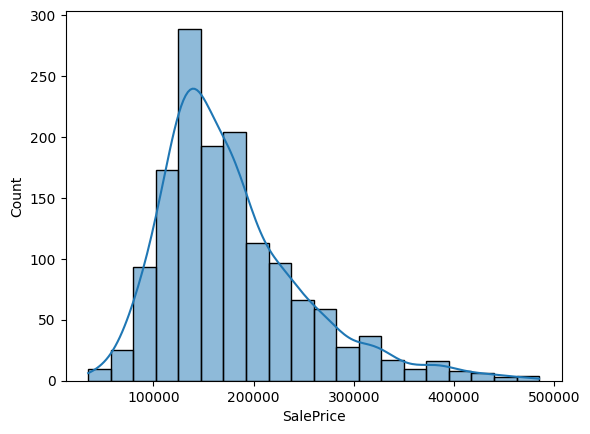

In [183]:
#20.Построить гистограмму SalePrice + распределение (Seaborn distplot).
sns.histplot(df[df['SalePrice'] < 500000]['SalePrice'], kde=True, bins=20)
plt.show()

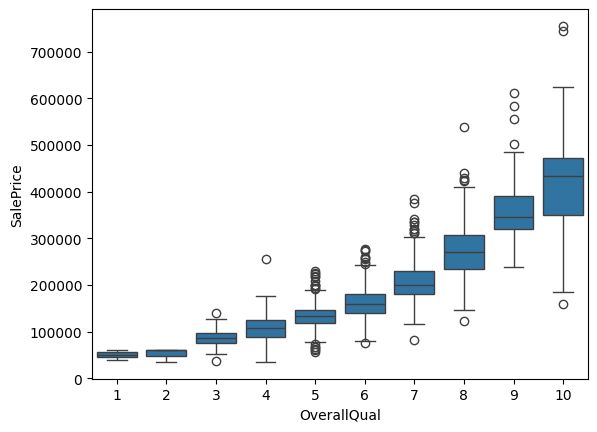

In [184]:
#21.Построить boxplot: OverallQual vs SalePrice.
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

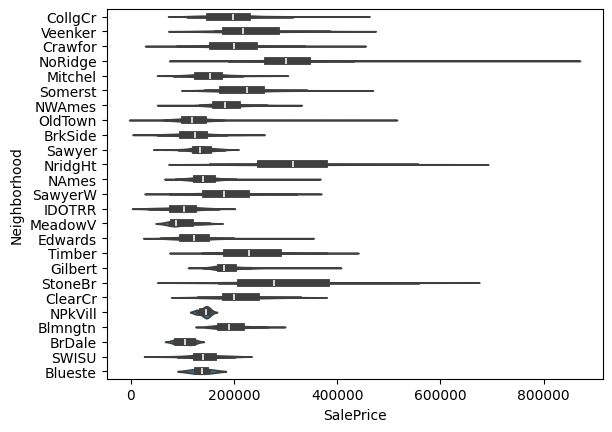

In [185]:
#22.Построить violinplot: Neighborhood vs SalePrice.
sns.violinplot(y='Neighborhood', x='SalePrice', data=df)
plt.show()

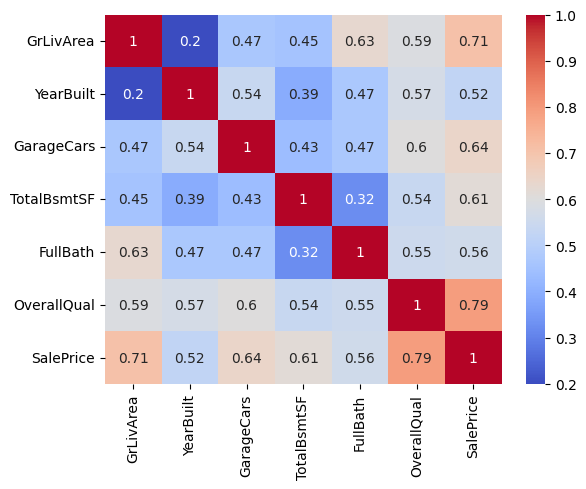

In [186]:
#23.Построить heatmap корреляции между 6 числовыми признаками.
sns.heatmap(corr_cols, annot=True, cmap='coolwarm')
plt.show()

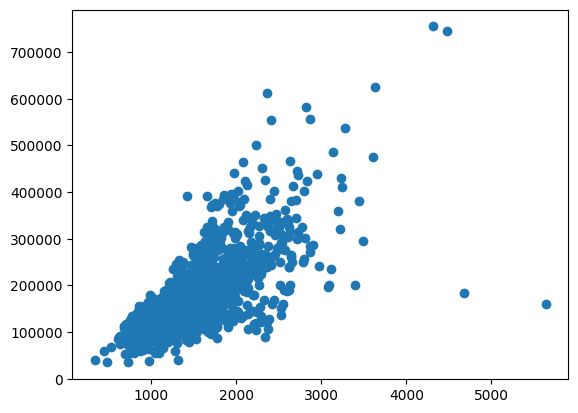

In [187]:
#24.Построить scatterplot:
#GrLivArea vs SalePrice
#TotalBsmtSF vs SalePrice
#YearBuilt vs SalePrice
plt.scatter(x='GrLivArea', y='SalePrice', data=df)
plt.show()

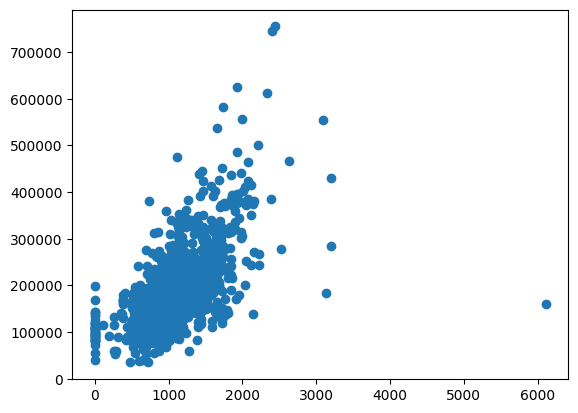

In [188]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

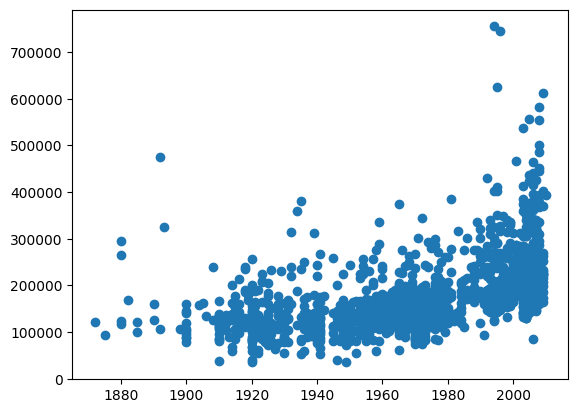

In [189]:
plt.scatter(x='YearBuilt', y='SalePrice', data=df)
plt.show()

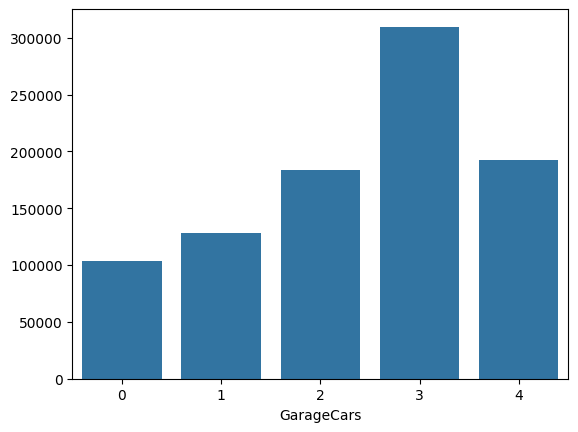

In [190]:
#25.Построить barplot: средняя цена по GarageCars.
garage_mean = df.groupby('GarageCars')['SalePrice'].mean()
sns.barplot(x=garage_mean.index, y=garage_mean.values)
plt.show()

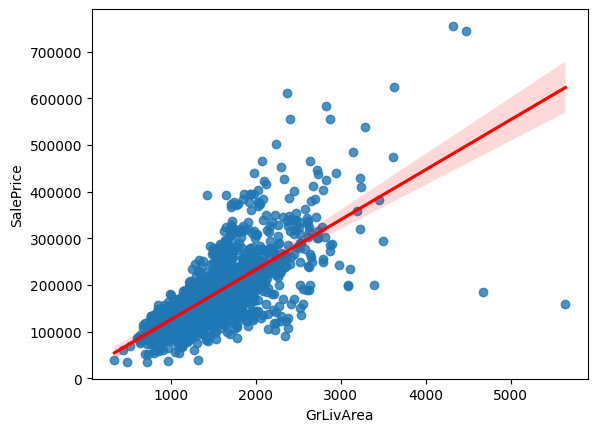

In [191]:
#26.Построить линейную регрессию regplot для GrLivArea vs SalePrice.
sns.regplot(x='GrLivArea', y='SalePrice', data=df, line_kws={'color': 'red'})
plt.show()

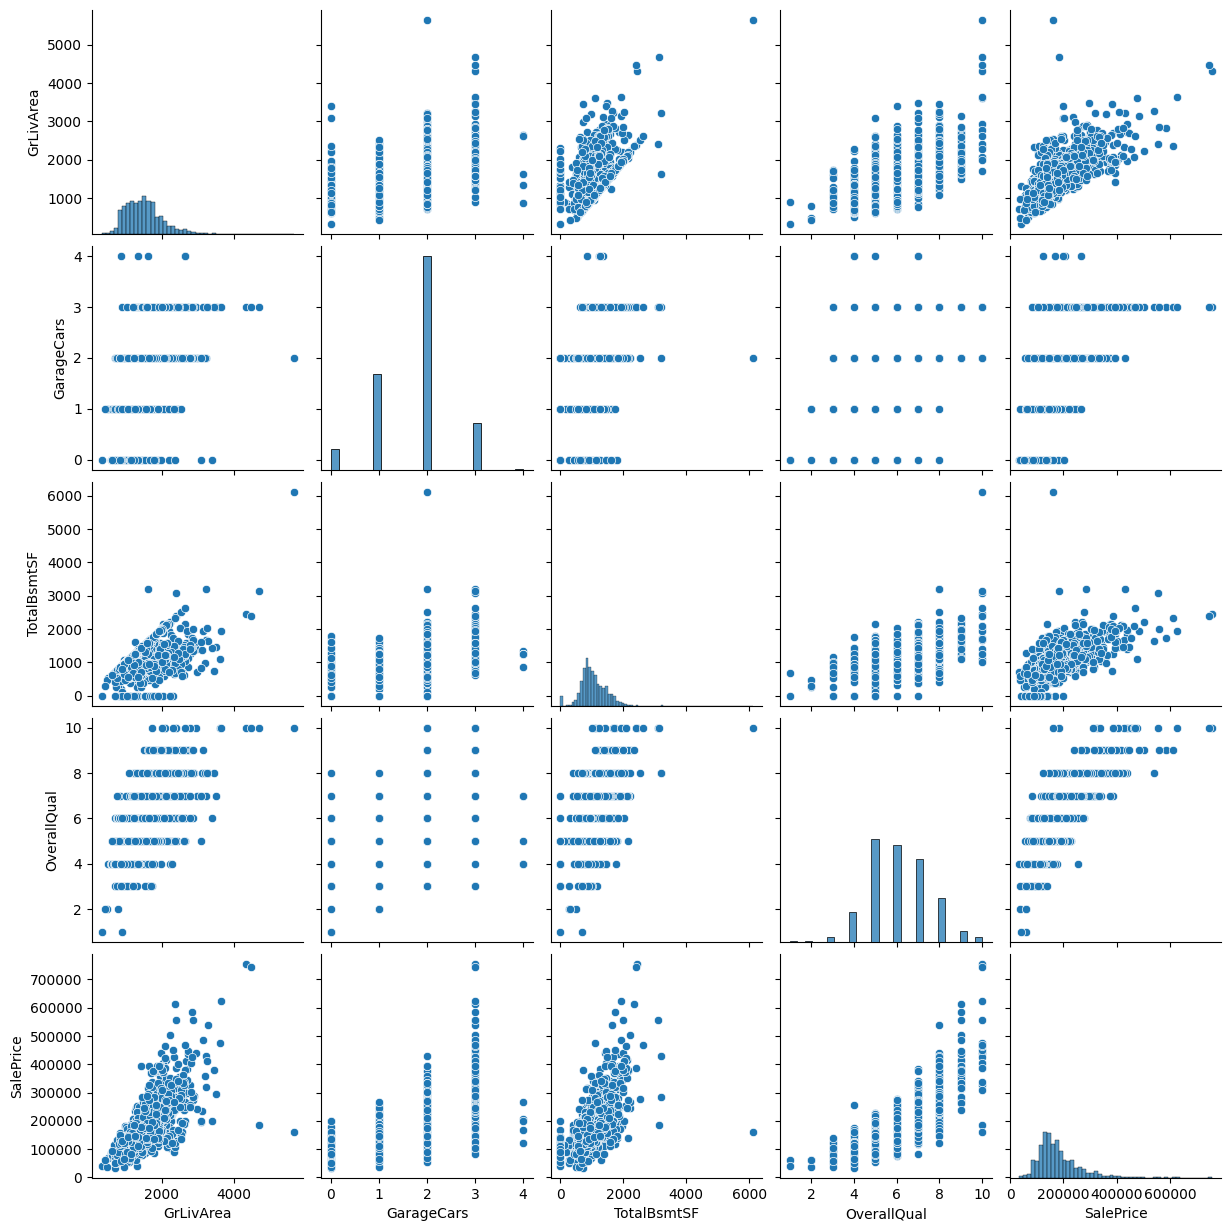

In [192]:
#27.Построить pairplot по всем числовым признакам.
sns.pairplot(df[['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallQual', 'SalePrice']])
plt.show()

ЭТАП 2

In [193]:
#28.Обработать пропущенные значения (если есть).
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


In [194]:
df.shape

(1460, 82)

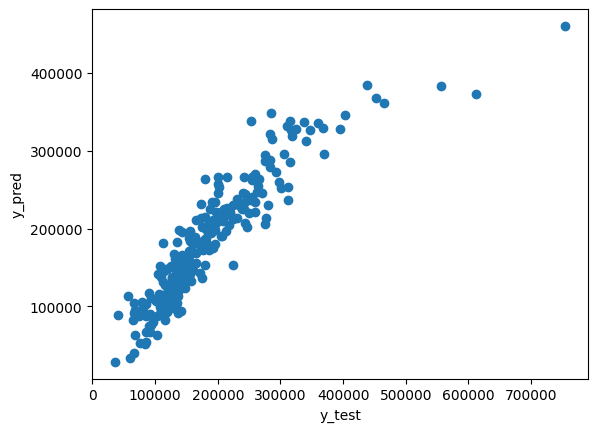

In [195]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [196]:
#30.Нормализовать числовые признаки (MinMaxScaler или StandardScaler).

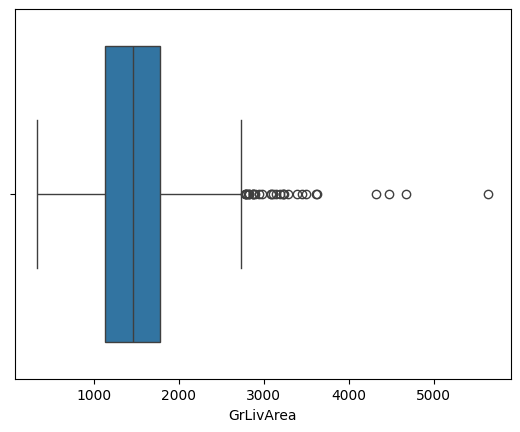

In [197]:
#31.Проверить выбросы (boxplot) и удалить из GrLivArea и SalePrice.
sns.boxplot(x=df['GrLivArea'])
plt.show()

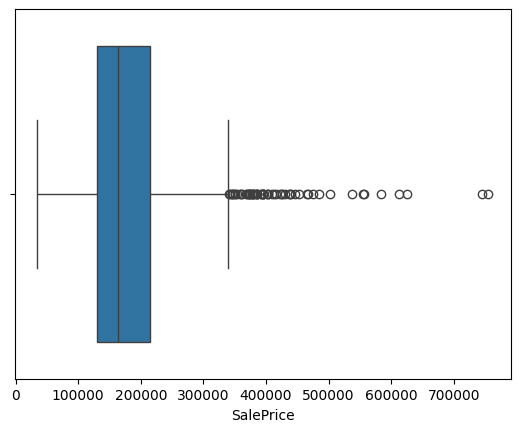

In [198]:
sns.boxplot(x=df['SalePrice'])
plt.show()

In [199]:
#32.Разделить данные на X и y, где y = SalePrice.
df =  df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
        'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Neighborhood', 'SalePrice']]


In [200]:
new_df = pd.get_dummies(df.drop(columns=['SalePrice']), columns=['Neighborhood'], drop_first=True).astype(int)

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)

In [202]:
X = scaled_data
y = df['SalePrice']

In [203]:
#33.Разбить данные на train/test (train_test_split, 80/20).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ЭТАП 3

In [204]:
#34.Построить модель LinearRegression() из sklearn.linear_model.
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [205]:
#35.Обучить модель на тренировочных данных.
model.fit(X_train, y_train)

LinearRegression()

In [206]:
#36.Сделать предсказания на тесте.
y_pred = model.predict(X_test)

In [207]:
#38.Построить y_test vs y_pred график.

In [208]:
#39.Вывести веса признаков (model.coef_, model.intercept_).

In [209]:
#37.Посчитать метрики:
#MAE, MSE, RMSE, R²

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 22148.52
MSE: 1318807797.18
RMSE: 36315.39
R²: 0.83


In [210]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

random_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

In [211]:
random_model.fit(X_train, y_train)

RandomForestRegressor()

In [212]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [213]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [214]:
print('lr', model.score(X_test, y_test))
print('rf', random_model.score(X_test, y_test))
print('gb', gb_model.score(X_test, y_test))
print('xgb', xgb_model.score(X_test, y_test))
print(f'R²: {r2:.2f}')

lr 0.8280636622808409
rf 0.8924981066949308
gb 0.9016103635712683
xgb 0.8848058581352234
R²: 0.83


In [215]:
y_pred_log = model.predict(X_test)
y_pred_rf = random_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [216]:
from sklearn.metrics import r2_score

print('Logistic Regression:', r2_score(y_test, y_pred_log))
print('Random Forest:', r2_score(y_test, y_pred_rf))
print('GB:', r2_score(y_test, y_pred_gb))
print('XGB:', r2_score(y_test, y_pred_xgb))

Logistic Regression: 0.8280636622808409
Random Forest: 0.8924981066949308
GB: 0.9016103635712683
XGB: 0.8848058581352234


In [217]:
import joblib

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(gb_model, 'gb_model.pkl')

['gb_model.pkl']

In [219]:
df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Neighborhood,SalePrice
0,7,1710,2,548,856,856,2,2003,2003,8,CollgCr,208500
1,6,1262,2,460,1262,1262,2,1976,1976,6,Veenker,181500
2,7,1786,2,608,920,920,2,2001,2002,6,CollgCr,223500
3,7,1717,3,642,756,961,1,1915,1970,7,Crawfor,140000
4,8,2198,3,836,1145,1145,2,2000,2000,9,NoRidge,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,1999,2000,7,Gilbert,175000
1456,6,2073,2,500,1542,2073,2,1978,1988,7,NWAmes,210000
1457,7,2340,1,252,1152,1188,2,1941,2006,9,Crawfor,266500
1458,5,1078,1,240,1078,1078,1,1950,1996,5,NAmes,142125


In [220]:
df.dtypes

,0
OverallQual,int64
GrLivArea,int64
GarageCars,int64
GarageArea,int64
TotalBsmtSF,int64
1stFlrSF,int64
FullBath,int64
YearBuilt,int64
YearRemodAdd,int64
TotRmsAbvGrd,int64
